# HOMEWORK:

## 1.- Derive Bayes theorem from $p(x,y)=p(y,x)$.

### Tenemos de la regla del producto
### $p(x,y)=p(x|y)p(y)$
### y partiendo de
### $p(x,y)=p(y,x)$
### tenemos entonces 
### $p(x,y)=p(x|y)p(y)=p(y|x)p(x)=p(y,x)$
### y despejando de la expresión anteior tenemos finalmente:
### $p(y|x)=\frac{p(x|y)p(y)}{p(x)}$

## 2.- Las catafixias de chabelo:

### Hay 3 puertas,detrás de una hay un premio. Supongamos que eliges la puerta 2, Chabelo abre la puerta 1 y allí no hay un premio. ¿Te quedas con tu elección original o cambias a la puerta 3?

Si sólo escojo una de las 3 puertas, tendré una probabilidad de escoger una puerta que contenga el premio será igual a $p(ganar)=\frac{1}{3}$, pero si después de haber elegido una puerta y Chabelo abre una de las no escogidas la cuál no contiene el premio y se nos da la opción de escoger entre las dos restantes, uno pensaría que la probabilidad de ganar si cambiamos nuestra elección inicial sería $1/2$ pero en realidad eso no es cierto, el teorema de Bayes nos permite encontrar la verdadera probabilidad. Si definimos de la demostración anterior:

### -$p(y)\rightarrow$ Probabilidad de elegir la puerta que NO contiene el premio antes de cambiar la elección incial.

### -$p(x|y) \rightarrow$ Probabilidad de obtener el premio al cambiar la elección inicial por la opción restante dado que inicialmente había elegido una que NO contenía el premio.

### -$p(x) \rightarrow$ Probabilidad de obtener el premio el premio si se cambia a la opción restante.

### -$p(y|x) \rightarrow$ Probabilidad  de escoger una puerta errónea inicialmente dado que al cambiar de opinión se elige la que SÍ contiene el premio.

donde:
### $p(x)$ es nuestra probabilidad de interés.
### $p(y)=\frac{2}{3}$
### $p(x|y)=1$
### $p(y|x)=1$
### y del teorema de Bayes tenemos entonces que:
### $p(x)=\frac{(1)(\frac{2}{3})}{(1)}= \frac{2}{3}$

### por el resultado anterior vemos que si mantenemos la elección inicial tenemos $1/3$ de probabilidad de ganar el premio, pero si elegimos cambiar nuestra opción inicial una vez que se nos revela una de las puertas sin el premio la probabilidad de elegir la puerta con el premio es $2/3$. 
## Por lo tanto es más conveniente cambiar de elección.

# 3.-MCMC Metropolis Algorithm:

### Implement it in Python and make sure it works for the example of the straight line, but do it in a way it is easy to change data, model, likelihood and prior.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from IPython import display
import seaborn as sns
import pymc3 as pm
sns.set(style="darkgrid", palette="muted")

In [7]:
a=np.load('fit_exercise.npy')
x=a[0]
y=a[1]
y_err=a[2]

In [8]:
class StraightLineModel(object):
    
    def __init__(self, x, y, y_err):
        self.x = np.asarray(x)
        self.y = np.asarray(y)
        self.y_err = np.asarray(y_err)

    def ln_likelihood(self, pars):
        N = len(self.y)
        dy = self.y - line_model(pars, self.x)
        ivar = 1 / self.y_err**2 # inverse-variance
        return -0.5 * (N*np.log(2*np.pi) + np.sum(2*np.log(self.y_err)) + np.sum(dy**2 * ivar))

    def ln_prior(self, pars):
        a, b = pars # unpack parameters
        ln_prior_val = 0. # we'll add to this

        if a < 0 or a > 100.:
            return -np.inf
        else:
            ln_prior_val += np.log(1E-2) # normalization, log(1/100)

        if b < -50 or b > 50.:
            return -np.inf
        else:
            ln_prior_val += np.log(1E-2) # normalization, log(1/100)

        return ln_prior_val

    def ln_posterior(self, pars):
        lnp = self.ln_prior(pars)
        if np.isinf(lnp): # short-circuit if the prior is infinite (don't bother computing likelihood)
            return lnp

        lnL = self.ln_likelihood(pars)
        lnprob = lnp + lnL

        if np.isnan(lnprob):
            return -np.inf

        return lnprob
    
    def __call__(self, pars):
        return self.ln_posterior(pars)

In [36]:
model = StraightLineModel(x, y, y_err)
df2= pd.DataFrame(a)
df2=pd.DataFrame.transpose(df2)
df2= df2.drop([2], axis=1)
df2

,0,1
0,0.596779,8.112571
1,0.921049,3.528151
2,1.156184,4.810234
3,1.754518,0.892382
4,1.824917,3.132952
5,2.268515,3.533380
6,2.282632,1.899340
7,2.504554,2.838963
8,2.861393,0.897139
9,2.937140,0.950002


/Users/valdiviagcr/miniconda3/envs/ambiente1/lib/python3.7/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


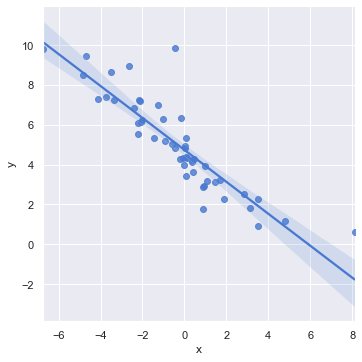

In [44]:
def simulate_linear_data(N, beta_0, beta_1, eps_sigma_sq,df2):
    # Create a pandas DataFrame with column 'x' containing
    # N uniformly sampled values between 0.0 and 1.0
    df= pd.DataFrame(df2[0])

    # Use a linear model (y ~ beta_0 + beta_1*x + epsilon) to 
    # generate a column 'y' of responses based on 'x'
    df["x"] = df2[1]
    df=df.rename(columns={0:'y'})
    return df


if __name__ == "__main__":
    # These are our "true" parameters
    beta_0 = 1.0  # Intercept
    beta_1 = 2.0  # Slope

    # Simulate 100 data points, with a variance of 0.5
    N = 100
    eps_sigma_sq = 0.5

    # Simulate the "linear" data using the above parameters
    df = simulate_linear_data(N, beta_0, beta_1, eps_sigma_sq, df2)

    # Plot the data, and a frequentist linear regression fit
    # using the seaborn package
    sns.lmplot(x="x", y="y", data=df, size=5)
    #plt.xlim(-10, 10)

In [61]:
def glm_mcmc_inference(df, iterations=5000):
    # Use PyMC3 to construct a model context
    basic_model = pm.Model()
    with basic_model:
        # Create the glm using the Patsy model syntax
        # We use a Normal distribution for the likelihood
        pm.glm.GLM("y ~ x", df, family=pm.glm.families.Normal())

        # Use Maximum A Posteriori (MAP) optimisation as initial value for MCMC
        start = pm.find_MAP()

        # Use the No-U-Turn Sampler
        step = pm.NUTS()

        # Calculate the trace
        trace = pm.sample(
            iterations, step, start, 
            random_seed=42, progressbar=True
        )

    return trace

...
...

if __name__ == "__main__":
    ...
    ...
    trace = glm_mcmc_inference(df, iterations=5000)
    pm.traceplot(trace[500:])
    plt.show()

TypeError: Only one-dimensional observed variable objects (i.e. of shape `(n, )`) are supported

In [62]:
if __name__ == "__main__":
    ..
    ..

    # Plot a sample of posterior regression lines
    sns.lmplot(x="x", y="y", data=df, size=10, fit_reg=False)
    plt.xlim(0.0, 1.0)
    plt.ylim(0.0, 4.0)
    pm.glm.plot_posterior_predictive(trace, samples=100)
    x = np.linspace(0, 1, N)
    y = beta_0 + beta_1*x
    plt.plot(x, y, label="True Regression Line", lw=3., c="green")
    plt.legend(loc=0)
    plt.show()

SyntaxError: invalid syntax (<ipython-input-62-f455b6397394>, line 2)